In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv('https://data.statistik.gv.at/data/OGD_gest_kalwo_GEST_KALWOCHE_100.csv', sep=';')
csv

,C-KALWOCHE-0,C-B00-0,C-ALTERGR65-0,C-C11-0,F-ANZ-1
0,KALW-200001,B00-1,ALTERSGR65-1,C11-1,8
1,KALW-200001,B00-1,ALTERSGR65-1,C11-2,2
2,KALW-200001,B00-1,ALTERSGR65-2,C11-1,25
3,KALW-200001,B00-1,ALTERSGR65-2,C11-2,33
4,KALW-200001,B00-2,ALTERSGR65-1,C11-1,7
...,...,...,...,...,...
39066,KALW-202046,B00-8,ALTERSGR65-2,C11-2,32
39067,KALW-202046,B00-9,ALTERSGR65-1,C11-1,27
39068,KALW-202046,B00-9,ALTERSGR65-1,C11-2,20
39069,KALW-202046,B00-9,ALTERSGR65-2,C11-1,167


In [3]:
deaths_per_week = csv.groupby('C-KALWOCHE-0').sum().squeeze()
deaths_per_week

C-KALWOCHE-0
KALW-200001    1867
KALW-200002    1902
KALW-200003    2027
KALW-200004    1940
KALW-200005    1928
               ... 
KALW-202042    1613
KALW-202043    1770
KALW-202044    1885
KALW-202045    2006
KALW-202046    2286
Name: F-ANZ-1, Length: 1089, dtype: int64

In [4]:
df = pd.DataFrame(columns=['year', 'week', 'deaths'])

for yearweek, dead in deaths_per_week.iteritems():
    year = int(yearweek[5:9])
    week = int(yearweek[9:11])
    dead = int(dead)
    df = df.append({'year': year, 'week': week, 'deaths': dead}, ignore_index=True)

In [5]:
df

,year,week,deaths
0,2000,1,1867
1,2000,2,1902
2,2000,3,2027
3,2000,4,1940
4,2000,5,1928
...,...,...,...
1084,2020,42,1613
1085,2020,43,1770
1086,2020,44,1885
1087,2020,45,2006


In [6]:
year = {}
for y in range(2000, 2020+1):
    df_year = df[df.year == y]
    deaths = df_year.deaths
    deaths.index = df_year.week
    year[y] = deaths

In [7]:
year[2020]

week
1     1611
2     1702
3     1797
4     1779
5     1947
6     1681
7     1721
8     1718
9     1768
10    1744
11    1718
12    1836
13    1765
14    1828
15    1793
16    1704
17    1588
18    1480
19    1520
20    1489
21    1481
22    1416
23    1490
24    1461
25    1413
26    1437
27    1561
28    1383
29    1443
30    1452
31    1526
32    1433
33    1607
34    1477
35    1497
36    1522
37    1568
38    1569
39    1532
40    1580
41    1624
42    1613
43    1770
44    1885
45    2006
46    2286
Name: deaths, dtype: object

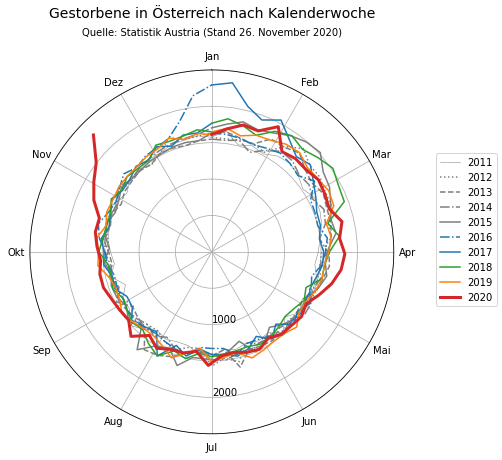

In [8]:
def data_for_year(y):
    # append first week of next year for correct radial plotting
    return year[y].append(pd.Series(year[y+1][1], index=[len(year[y])+1]))

def plot_year(ax, y, **kwargs):
    ax.plot(np.linspace(0, 2*np.pi, len(data_for_year(y))), data_for_year(y), label=f"{y}", **kwargs)

def setup_polar_plot():
    fig = plt.figure(figsize=(8, 6), constrained_layout=True)
    ax = plt.subplot(111, projection='polar')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/6))
    ax.set_xticklabels(months)

    ax.set_rlabel_position(180)
    ax.set_yticklabels(['', '1000', '', '2000', ''])

    return fig, ax

fig, ax = setup_polar_plot()

# plot_year(ax, 2000, linewidth=0.5)
# plot_year(ax, 2001, linewidth=0.5)
# plot_year(ax, 2002, linewidth=0.5)
# plot_year(ax, 2003, linewidth=0.5)
# plot_year(ax, 2004, linewidth=0.5)
# plot_year(ax, 2005, linewidth=0.5)
# plot_year(ax, 2006, linewidth=0.5)
# plot_year(ax, 2007, linewidth=0.5)
# plot_year(ax, 2008, linewidth=0.5)
# plot_year(ax, 2009, linewidth=0.5)
# plot_year(ax, 2010, linewidth=0.5)

plot_year(ax, 2011, color='tab:gray', linewidth=0.5)
plot_year(ax, 2012, color='tab:gray', linestyle='dotted')
plot_year(ax, 2013, color='tab:gray', linestyle='dashed')
plot_year(ax, 2014, color='tab:gray', linestyle='dashdot')
plot_year(ax, 2015, color='tab:gray')
plot_year(ax, 2016, color='tab:blue', linestyle='dashdot')
plot_year(ax, 2017, color='tab:blue')
plot_year(ax, 2018, color='tab:green')
plot_year(ax, 2019, color='tab:orange')

# 2020
num_weeks = len(year[2020])
day_of_the_year = num_weeks*7 - 3 # ex. week 46 -> november 15 -> day 319
ax.plot(np.linspace(0, (day_of_the_year/365)*2*np.pi, num_weeks), year[2020], label="2020", color='tab:red', linewidth=3)

ax.set_rmax(2500)
fig.legend(loc='center right')

fig.suptitle("Gestorbene in Österreich nach Kalenderwoche", fontsize=14, y=1.04)
ax.set_title("Quelle: Statistik Austria (Stand 26. November 2020)", fontsize=10, y=1.08)

plt.savefig('gestorbene.png', dpi=300, bbox_inches='tight', facecolor='white')

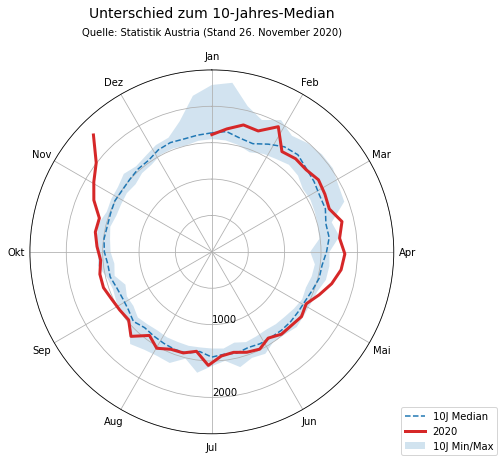

In [9]:
df_concat = pd.concat((year[2019], year[2018], year[2017], year[2016], year[2015]), axis=1)
df_concat = pd.concat((df_concat, year[2014], year[2013], year[2012], year[2011], year[2010]), axis=1)

mean = df_concat.mean(axis=1)
mean[53] = mean[1]

median = df_concat.median(axis=1)
median[53] = median[1]

min = df_concat.min(axis=1)
min[53] = min[1]

max = df_concat.max(axis=1)
max[53] = max[1]

fig, ax = setup_polar_plot()

# ax.plot(np.linspace(0, 2*np.pi, len(mean)), mean, label="5y mean")
# ax.plot(np.linspace(0, 2*np.pi, len(data_for_year(2019))), data_for_year(2019), label="2019")

ax.fill_between(np.linspace(0, 2*np.pi, len(min)), min, max, alpha=0.2, label="10J Min/Max")
ax.plot(np.linspace(0, 2*np.pi, len(median)), median, label="10J Median", linestyle='dashed')
ax.plot(np.linspace(0, (day_of_the_year/365)*2*np.pi, len(year[2020])), year[2020], label="2020", color='tab:red', linewidth=3)

ax.set_rmax(2500)
fig.legend(loc='lower right')

fig.suptitle(f"Unterschied zum 10-Jahres-Median", fontsize=14, y=1.04)
ax.set_title("Quelle: Statistik Austria (Stand 26. November 2020)", fontsize=10, y=1.08)

plt.savefig('median.png', dpi=300, bbox_inches='tight', facecolor='white')